In [ ]:
import random
random.seed(42)

In [ ]:
#prepare dataset
from dataset_prepare import dataset_convert

dataset_path = './dataset'  #куда распаковать архивы

classes_map = {'4': '0'}  #Приводим класс car к единственному
dataset_convert(dataset_path, classes=classes_map)

unzip ok
will be deleted from ./dataset/VisDrone2019-DET-train 303 files
will be deleted from ./dataset/VisDrone2019-DET-val 31 files


9999953_00000_d_0000161.txt


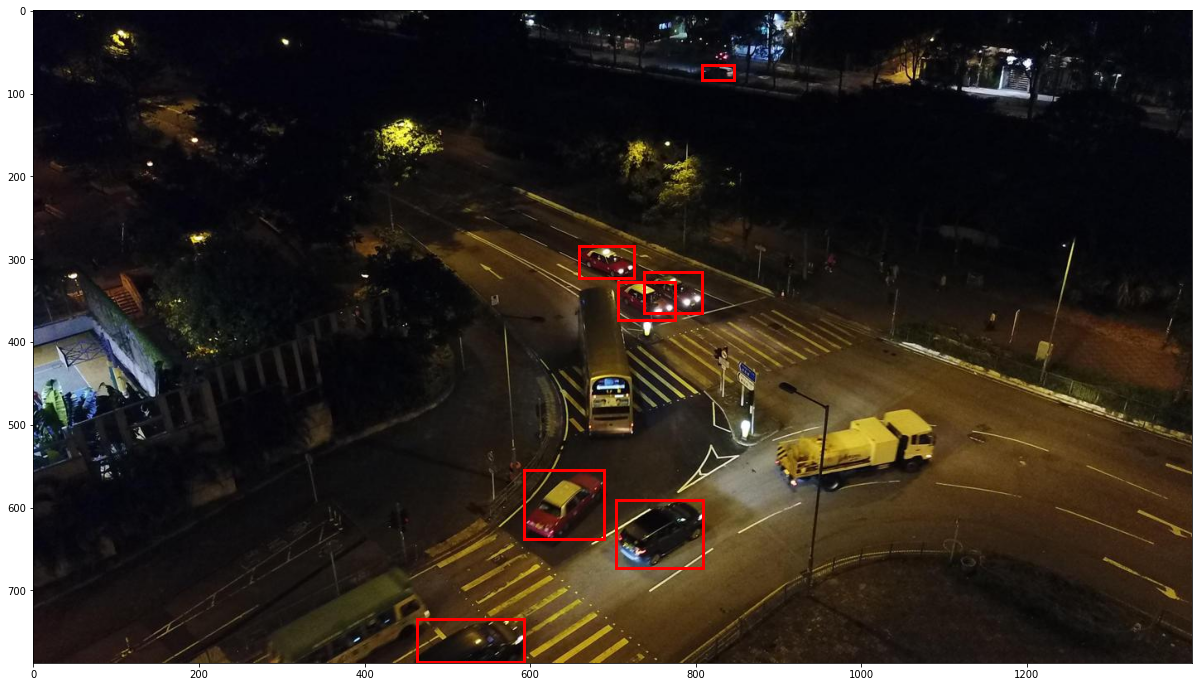

In [20]:
def show_random_image(path, fig_size = (24, 12)):
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    import random
    import os

    def yolo_to_bbox(yolo_detection, image_width, image_height):
        class_id, x_center, y_center, width, height = yolo_detection
        x_min = (x_center - width / 2) * image_width
        y_min = (y_center - height / 2) * image_height
        x_max = (x_center + width / 2) * image_width
        y_max = (y_center + height / 2) * image_height
        return int(x_min), int(y_min), int(x_max), int(y_max), class_id
    
    labels = os.listdir(f'{path}/labels')

    label = random.choice(labels)

    print(label)

    image = plt.imread(f'{path}/images/{label.split(".")[0] }.jpg') 
    img_classes = open(f'{path}/labels/{label}', 'r').readlines()   
    img_classes = [s.split() for s in img_classes]
    fig, ax = plt.subplots(figsize=fig_size)

    yolo_labels = []

    for label in img_classes:
        img_class, *coords =  label
        yolo_labels.append([img_class, *[float(i) for i in coords]])
    
    #paint rectangles over image
    for label in yolo_labels:
        x_min, y_min, x_max, y_max, class_id = yolo_to_bbox(label, image.shape[1], image.shape[0])
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                linewidth=3, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    ax.imshow(image)

show_random_image(f'{dataset_path}/VisDrone2019-DET-train')

In [1]:
from ultralytics import YOLO
import os

model_path = './drone_s/train/weights'

#Если есть последний файл чекпоинта то продолжаем тренировку
#если чейкпоинта нет, начинаем сначала

if os.path.exists(f'{model_path}/last.pt'):
    print('continue train from last checkpoint')

    model = YOLO(f'{model_path}/last.pt')
    model.train(data="./VisDrone.yaml", resume=True, project='./drone_s', plots = True)

else:
    model = YOLO("./models/small/yolo11s.pt") #Загружаем small предобученную модель 

    results = model.train(
        data="./VisDrone.yaml", #Описание доработанного датасета с одним классом
        epochs=100, #Количество эпох обучения
        imgsz=640, #размер изображения
        batch=16, #размер батча
        patience=15, #количество эпох для ранней остановки
        save_period=1, #сохраняем результат каждой эпохи
        exist_ok=True, #перезаписываем результат
        project='./drone_s', #путь с проектом
        deterministic=False,
        plots = True)   #визуализация тренировки

continue train from last checkpoint
New https://pypi.org/project/ultralytics/8.3.99 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.94  Python-3.9.1 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3070, 8191MiB)
engine\trainer: task=detect, mode=train, model=drone_s\train\weights\last.pt, data=./VisDrone.yaml, epochs=100, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=./drone_s, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=False, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=drone_s\train\weights\last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnosti

train: Scanning D:\projects\visdrone\dataset\VisDrone2019-DET-train\labels.cache... 6168 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6168/6168 [00:00<?, ?it/s]

train: WARNING  D:\projects\visdrone\dataset\VisDrone2019-DET-train\images\0000140_00118_d_0000002.jpg: 1 duplicate labels removed



c:\Users\Anton\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


albumentations: __init__() got an unexpected keyword argument 'quality_range'


val: Scanning D:\projects\visdrone\dataset\VisDrone2019-DET-val\labels.cache... 517 images, 0 backgrounds, 0 corrupt: 100%|██████████| 517/517 [00:00<?, ?it/s]


Plotting labels to drone_s\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Resuming training drone_s\train\weights\last.pt from epoch 29 to 100 total epochs
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to drone_s\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.94G      1.131     0.7289      1.044        287        640: 100%|██████████| 386/386 [01:16<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.41it/s]

                   all        517      14066      0.822      0.698      0.773      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.68G      1.103     0.6658     0.9085        142        640: 100%|██████████| 386/386 [01:35<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.26it/s]

                   all        517      14066      0.822        0.7      0.774       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.79G       1.09     0.6569     0.9063        200        640: 100%|██████████| 386/386 [01:09<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  5.93it/s]

                   all        517      14066      0.823      0.692      0.769      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.37G      1.081     0.6491     0.9022        224        640: 100%|██████████| 386/386 [04:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.50it/s]

                   all        517      14066      0.827      0.704      0.779      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.43G      1.081     0.6468     0.9012        325        640: 100%|██████████| 386/386 [01:08<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  5.91it/s]

                   all        517      14066      0.822      0.707      0.775      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.11G       1.07     0.6416     0.8983        295        640: 100%|██████████| 386/386 [01:16<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.69it/s]

                   all        517      14066      0.822      0.711       0.78      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.11G      1.069     0.6382      0.896        328        640: 100%|██████████| 386/386 [01:24<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.62it/s]

                   all        517      14066      0.821      0.711      0.782      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.11G      1.067     0.6371     0.8938        423        640: 100%|██████████| 386/386 [01:17<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.66it/s]

                   all        517      14066      0.832        0.7      0.779      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.11G      1.065     0.6365     0.8889        249        640: 100%|██████████| 386/386 [01:23<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.69it/s]

                   all        517      14066      0.832        0.7      0.778      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.11G      1.082     0.6482     0.8921        283        640: 100%|██████████| 386/386 [01:17<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.72it/s]

                   all        517      14066      0.826      0.703      0.779      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.11G       1.07     0.6416      0.888        216        640: 100%|██████████| 386/386 [01:23<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.68it/s]

                   all        517      14066      0.834      0.704      0.781       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.11G      1.066     0.6337     0.8845        345        640: 100%|██████████| 386/386 [01:16<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.71it/s]

                   all        517      14066      0.828       0.71      0.783      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.11G      1.063     0.6326     0.8827        330        640: 100%|██████████| 386/386 [01:23<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.69it/s]

                   all        517      14066      0.826      0.709      0.782      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.11G      1.066     0.6331     0.8799        101        640: 100%|██████████| 386/386 [01:16<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.71it/s]

                   all        517      14066      0.828      0.711      0.784      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.11G      1.048     0.6241     0.8783        447        640: 100%|██████████| 386/386 [01:23<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.70it/s]

                   all        517      14066      0.823      0.715      0.786      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.11G      1.058      0.626     0.8789        350        640: 100%|██████████| 386/386 [01:17<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.75it/s]

                   all        517      14066      0.834      0.709      0.784      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.11G      1.048     0.6229     0.8772        267        640: 100%|██████████| 386/386 [01:23<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.73it/s]

                   all        517      14066      0.835      0.706      0.786      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.11G      1.046     0.6185     0.8768        234        640: 100%|██████████| 386/386 [01:17<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.75it/s]

                   all        517      14066      0.835      0.707      0.789      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.11G      1.047     0.6189     0.8751        276        640: 100%|██████████| 386/386 [01:23<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.75it/s]

                   all        517      14066      0.842      0.709       0.79      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.11G       1.05     0.6182     0.8762        191        640: 100%|██████████| 386/386 [01:16<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.75it/s]

                   all        517      14066      0.829      0.712      0.784      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.11G       1.04     0.6169     0.8777        278        640: 100%|██████████| 386/386 [01:23<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.70it/s]

                   all        517      14066      0.839      0.709      0.789      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.11G      1.041     0.6115     0.8734        228        640: 100%|██████████| 386/386 [01:16<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.71it/s]

                   all        517      14066      0.834      0.717      0.789       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.11G      1.039     0.6085     0.8752        372        640: 100%|██████████| 386/386 [01:23<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.69it/s]

                   all        517      14066      0.834      0.717      0.791      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.11G      1.045     0.6141     0.8741        163        640: 100%|██████████| 386/386 [01:17<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.71it/s]

                   all        517      14066      0.826      0.721       0.79       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.11G      1.034     0.6052     0.8717        379        640: 100%|██████████| 386/386 [01:23<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.75it/s]

                   all        517      14066      0.833      0.722      0.792      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.11G      1.031     0.6058     0.8724        302        640: 100%|██████████| 386/386 [01:16<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.77it/s]

                   all        517      14066      0.836      0.715      0.789      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.11G      1.035     0.6018     0.8713        204        640: 100%|██████████| 386/386 [01:23<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.72it/s]

                   all        517      14066      0.833      0.722      0.793      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.11G      1.028     0.5996     0.8727        401        640: 100%|██████████| 386/386 [01:16<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.73it/s]

                   all        517      14066      0.839      0.716      0.792      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.11G      1.035     0.6038     0.8704        501        640: 100%|██████████| 386/386 [01:23<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.76it/s]

                   all        517      14066      0.842      0.716      0.793      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.11G      1.029     0.5992     0.8704        309        640: 100%|██████████| 386/386 [01:16<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.76it/s]

                   all        517      14066      0.841      0.717      0.794      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.11G      1.019     0.5936     0.8695        192        640: 100%|██████████| 386/386 [01:23<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.73it/s]

                   all        517      14066       0.84      0.719      0.795      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.11G      1.024      0.595     0.8689        358        640: 100%|██████████| 386/386 [01:16<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.74it/s]

                   all        517      14066      0.837      0.718      0.794      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.11G      1.024     0.5957     0.8691        517        640: 100%|██████████| 386/386 [01:23<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.74it/s]

                   all        517      14066       0.84      0.719      0.796      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.11G      1.028     0.5947     0.8693        386        640: 100%|██████████| 386/386 [01:16<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.77it/s]

                   all        517      14066      0.837      0.723      0.797      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.11G      1.023     0.5924      0.866        383        640: 100%|██████████| 386/386 [01:23<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.74it/s]

                   all        517      14066      0.841      0.719      0.795      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.11G      1.017     0.5864     0.8679        362        640: 100%|██████████| 386/386 [01:16<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.74it/s]

                   all        517      14066      0.838      0.718      0.796      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.11G      1.009     0.5839     0.8661        335        640: 100%|██████████| 386/386 [01:23<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.72it/s]

                   all        517      14066      0.843      0.718      0.797       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.11G      1.002     0.5819     0.8642        416        640: 100%|██████████| 386/386 [01:16<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.74it/s]

                   all        517      14066      0.835      0.723      0.797       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         8G      1.006      0.581     0.8655        328        640: 100%|██████████| 386/386 [01:58<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.88it/s]

                   all        517      14066      0.842       0.72      0.797      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.37G      1.007     0.5817     0.8649        258        640: 100%|██████████| 386/386 [01:08<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.01it/s]

                   all        517      14066       0.84      0.721      0.798       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.37G      1.002     0.5773     0.8633        261        640: 100%|██████████| 386/386 [01:07<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.06it/s]

                   all        517      14066      0.846      0.716      0.798      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.37G      1.001      0.575     0.8648        396        640: 100%|██████████| 386/386 [01:07<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.04it/s]

                   all        517      14066      0.841      0.722      0.798       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.91G      1.003     0.5781     0.8638        329        640: 100%|██████████| 386/386 [01:08<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.06it/s]

                   all        517      14066       0.84      0.721      0.798       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.42G     0.9985      0.574     0.8637        332        640: 100%|██████████| 386/386 [02:14<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.39it/s]

                   all        517      14066       0.84      0.722      0.799      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         7G     0.9913     0.5692     0.8628        347        640: 100%|██████████| 386/386 [01:07<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.06it/s]

                   all        517      14066      0.841      0.723        0.8      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         7G     0.9936     0.5687     0.8632        347        640: 100%|██████████| 386/386 [01:07<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.02it/s]

                   all        517      14066      0.847      0.719      0.799      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         7G      0.995     0.5679      0.862        218        640: 100%|██████████| 386/386 [01:07<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.07it/s]

                   all        517      14066      0.839      0.724      0.799      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         7G     0.9832     0.5615     0.8615        286        640: 100%|██████████| 386/386 [01:07<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.00it/s]

                   all        517      14066      0.843      0.721      0.798      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         7G     0.9876      0.564     0.8619        387        640: 100%|██████████| 386/386 [01:07<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.08it/s]

                   all        517      14066      0.844      0.719      0.798      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         7G     0.9912     0.5646     0.8609        369        640: 100%|██████████| 386/386 [01:07<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.07it/s]

                   all        517      14066      0.841      0.724      0.799      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         7G     0.9871      0.564     0.8606        240        640: 100%|██████████| 386/386 [01:07<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.01it/s]

                   all        517      14066      0.844      0.722      0.799      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         7G      0.986     0.5601     0.8608        268        640: 100%|██████████| 386/386 [01:07<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.09it/s]

                   all        517      14066      0.838      0.723      0.799      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         7G      0.988     0.5593       0.86        274        640: 100%|██████████| 386/386 [01:07<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.03it/s]

                   all        517      14066      0.844      0.723        0.8      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         7G     0.9738     0.5559     0.8573        218        640: 100%|██████████| 386/386 [01:07<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.01it/s]

                   all        517      14066      0.846      0.724      0.801      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         7G     0.9778     0.5533     0.8585        637        640: 100%|██████████| 386/386 [01:07<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.08it/s]

                   all        517      14066       0.84      0.725      0.801      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         7G     0.9743     0.5514     0.8599        195        640: 100%|██████████| 386/386 [01:07<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.04it/s]

                   all        517      14066       0.84      0.727      0.801      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         7G     0.9769     0.5523     0.8588        315        640: 100%|██████████| 386/386 [01:07<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.07it/s]

                   all        517      14066      0.847      0.724      0.801      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         7G     0.9742     0.5515     0.8588        251        640: 100%|██████████| 386/386 [01:07<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.06it/s]

                   all        517      14066      0.844      0.725      0.802      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         7G      0.964     0.5463     0.8548        326        640: 100%|██████████| 386/386 [01:07<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.06it/s]

                   all        517      14066      0.843      0.728      0.802      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.72G      0.958     0.5418     0.8572        198        640: 100%|██████████| 386/386 [01:20<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  5.68it/s]

                   all        517      14066      0.842      0.727      0.803      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.89G     0.9667      0.547     0.8568        304        640: 100%|██████████| 386/386 [01:07<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.11it/s]

                   all        517      14066      0.846      0.724      0.802      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.47G     0.9666     0.5428     0.8577        328        640: 100%|██████████| 386/386 [04:42<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.66it/s]

                   all        517      14066      0.849      0.722        0.8      0.564


Closing dataloader mosaic
albumentations: __init__() got an unexpected keyword argument 'quality_range'

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       6.4G     0.9526     0.5337     0.8553        159        640: 100%|██████████| 386/386 [01:06<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.03it/s]

                   all        517      14066      0.837      0.723      0.799      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       6.4G     0.9394     0.5232     0.8544        146        640: 100%|██████████| 386/386 [01:05<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.13it/s]

                   all        517      14066      0.842      0.722      0.799      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.02G      0.938       0.52     0.8523        134        640: 100%|██████████| 386/386 [01:06<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.06it/s]

                   all        517      14066       0.84      0.723      0.799      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.02G     0.9347     0.5181     0.8527        119        640: 100%|██████████| 386/386 [01:05<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.12it/s]

                   all        517      14066      0.841      0.725        0.8      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.02G      0.929     0.5155      0.852        178        640: 100%|██████████| 386/386 [01:06<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.09it/s]

                   all        517      14066       0.84      0.725        0.8      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.02G     0.9318     0.5147     0.8525        250        640: 100%|██████████| 386/386 [01:07<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.05it/s]

                   all        517      14066      0.842      0.723        0.8      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.02G      0.926     0.5122     0.8522        170        640: 100%|██████████| 386/386 [01:07<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.01it/s]

                   all        517      14066      0.844      0.724      0.801      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.02G      0.926     0.5109     0.8522        114        640: 100%|██████████| 386/386 [01:07<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.08it/s]

                   all        517      14066      0.843      0.725      0.801      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.02G     0.9234     0.5088       0.85        244        640: 100%|██████████| 386/386 [01:05<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.09it/s]

                   all        517      14066      0.845      0.724      0.801      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.02G     0.9265       0.51     0.8518        201        640: 100%|██████████| 386/386 [01:06<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.02it/s]

                   all        517      14066      0.845      0.724      0.801      0.564



72 epochs completed in 1.705 hours.
Optimizer stripped from drone_s\train\weights\last.pt, 19.1MB
Optimizer stripped from drone_s\train\weights\best.pt, 19.1MB

Validating drone_s\train\weights\best.pt...
Ultralytics 8.3.94  Python-3.9.1 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3070, 8191MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  1.95it/s]


                   all        517      14066      0.843      0.727      0.802      0.565
Speed: 0.2ms preprocess, 1.4ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to drone_s\train


In [1]:
%load_ext tensorboard

In [2]:
#Проводим валидацию модели
from ultralytics import YOLO

model = YOLO(f'{model_path}/best.pt')   #загружаем самую лучшую модель
metrics = model.val()

print(metrics.results_dict)

Ultralytics 8.3.94  Python-3.9.1 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3070, 8191MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning D:\projects\visdrone\dataset\VisDrone2019-DET-val\labels.cache... 517 images, 0 backgrounds, 0 corrupt: 100%|██████████| 517/517 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.30it/s]


                   all        517      14066       0.84      0.729      0.802      0.567
Speed: 0.2ms preprocess, 3.6ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs\detect\val37
{'metrics/precision(B)': 0.8404498483262193, 'metrics/recall(B)': 0.7286364282667425, 'metrics/mAP50(B)': 0.802093802513176, 'metrics/mAP50-95(B)': 0.5667306958714249, 'fitness': 0.5902670065356}


In [3]:
#Пример работы
model = model.eval()
results = model("./dataset/VisDrone2019-DET-test-dev/images/0000006_00159_d_0000001.jpg", save=True)  

#файл с боксами в папке demo

for result in results:
    result.show()  


image 1/1 d:\projects\visdrone\dataset\VisDrone2019-DET-test-dev\images\0000006_00159_d_0000001.jpg: 384x640 39 cars, 21.9ms
Speed: 1.5ms preprocess, 21.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict2


In [4]:
#Экспортируем в формат onnx

from ultralytics import YOLO
import shutil

model = YOLO(f'{model_path}/best.pt')   #загружаем самую лучшую модель

model.fuse()    #слияние слоев для оптимизации производительности

onnx_path = model.export(format="onnx",
             simplify=True, #упрощаем
             dynamic=True, #возможность обрабатывать батчами
             device=0   #gpu
             )

#перемещаем в папку с моделями
shutil.move(onnx_path, './models/small/y11_100ep16b640.onnx')  #В названии указываем параметры обучения 100эпох 16батч 640px

YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
Ultralytics 8.3.94  Python-3.9.1 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3070, 8191MiB)

PyTorch: starting from 'drone_s\train\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (18.3 MB)

ONNX: starting export with onnx 1.14.1 opset 16...
ONNX: slimming with onnxslim 0.1.36...
ONNX: export success  14.7s, saved as 'drone_s\train\weights\best.onnx' (36.1 MB)

Export complete (14.8s)
Results saved to D:\projects\visdrone\drone_s\train\weights
Predict:         yolo predict task=detect model=drone_s\train\weights\best.onnx imgsz=640  
Validate:        yolo val task=detect model=drone_s\train\weights\best.onnx imgsz=640 data=./VisDrone.yaml  
Visualize:       https://netron.app


'./models/small/y11_100ep16b640.onnx'